# Trabajo Práctico: Procesamiento de datos

En la carpeta `data` se encuentra los datos crudos de ventas durante el 2022 de las diferentes sedes de una cadeda de tiendas DuttyFree ubicadas en distintos aeropuertos del país. Esta información se encuentra en distintos archivos en formato `.parquet` los cuales deben ser reconstruidos. La compañía desea analizar los datos para apoyar su proceso de toma de decisiones. Sin embargo, estos datos son recolectados manualmente desde cada una de las sedes por lo que se requiere previamente realizar una limpieza y procesamiento de los datos.

## Carga de configuraciones:

In [1]:
import pandas as pd
import matplotlib.pylab as plt
import os
pd.set_option('display.max_columns', 50)

## Reconstrucción de los datos

Para manejar datos de archivos `.parquet` se requiere tener instalado uno de los siguientes paquetes: `pyarrow` o `fastparquet`. Para instalarlos, ejecute alguno de los siguientes comandos:

```
!pip install pyarrow
!pip install fastparquet
```

Lea y reconstruya los datos unificandolos en un mismo DataFrame. Luego, conteste las siguientes preguntas:

1. ¿Cuántos registros tienen los datos?
2. ¿Cuántas columnas tienen los datos?
3. De una breve explicación de los datos que contiene cada columna.
4. ¿Existe alguna columna que contenga un 'identificador único'? ¿Existen registros duplicados en este campo?
5. Haga un recuento de valores para cada columna categórica. ¿Existen valores con un mismo significado?

# Solucion
### 1 y 2. La cantidad de registros y columnas son 781632 y 29 respectivamente

### 3. Los datos son unas ventas de diferentes tiendas Duty Free a nivel nacional, con los precios, el metodo de pago, etc

### 4. El identificador unico es el id de la tienda y no existen valores duplicados

### 5. 

In [2]:
list_files = os.listdir('data/')
list_files

['Ventas_DuttyFree_0.parquet',
 'Ventas_DuttyFree_100000.parquet',
 'Ventas_DuttyFree_200000.parquet',
 'Ventas_DuttyFree_300000.parquet',
 'Ventas_DuttyFree_400000.parquet',
 'Ventas_DuttyFree_500000.parquet',
 'Ventas_DuttyFree_600000.parquet',
 'Ventas_DuttyFree_700000.parquet']

## Manipulación de datos

Luego de reconstruir y analizar los datos, se identificaron opciones de mejorar la calidad de los datos. Realice:

1. Elimine columnas que contengan datos duplicados.
2. Para las columnas categóricas, unifique los valores con significados duplicados.

In [3]:
df = pd.read_parquet('data/')
df

,id_tienda,nombre_tienda,sigla,aeropuerto,latitud,longitud,ciudad,region,id_compra,moneda,monto,tipo_viaje,tipo_transito,nacionalidad,fecha,hora,minuto,medio_pago,franquicia_tdc,porcentaje_iva,monto_iva,lleva_bolsa_plastica,lleva_alcohol,lleva_tabaco,lleva_libros,monto_pagado,monto_pagado_cop,monto_pagado_usd,monto_pagado_eur
0,900,DutyFree Costero,BAQ,Ernesto Cortissoz,10.88655,-74.77633,Barranquilla,Costa,5233170,EUR,28.26,Nacional,Arrival,Extranjera,2022-02-03,2,5,TDC,Mastercard,0.19,5.3694,1.0,1.0,NaN,NaN,EUR 28.26,NaN,NaN,28.26
1,500,DutyFree Galeras,PSO,Antonio Narino,1.39556,-77.28974,Pasto,Sur,643524,pesos colombianos,321300.00,Internacional,Arrival,Colombiana,2022-04-02,11,9,Efectivo,None,NaN,NaN,NaN,NaN,NaN,NaN,pesos colombianos 321300.0,NaN,NaN,NaN
2,600,DutyFree Capital,BOG,El Dorado,4.70103,-74.14609,Bogota,Centro,8990758,pesos colombianos,48200.00,Local,Departure,Colombiana,2022-06-26,5,57,Tarjeta,MCD,0.19,9158.0000,1.0,0.0,NaN,1.0,pesos colombianos 48200.0,NaN,NaN,NaN
3,300,DutyFree Paisa,PEI,Matecaña,4.81580,-75.73637,Pereira,Eje Cafetero,637092,dolares americanos,101.52,Local,Departure,Colombiana,2022-10-02,17,6,TDC,VISA,0.19,19.2888,1.0,1.0,NaN,0.0,dolares americanos 101.52,NaN,NaN,NaN
4,900,DutyFree Costero,BAQ,Ernesto Cortissoz,10.88655,-74.77633,Barranquilla,Costa,6853184,euros,272.79,Nacional,Departure,Extranjera,2022-03-03,3,7,TDC,AMEX,0.19,51.8301,0.0,NaN,1.0,NaN,euros 272.79,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
781627,100,DutyFree Paisa,MDE,Jose Maria Cordoba,6.17160,-75.42775,Rionegro,Eje Cafetero,9683054,euros,115.17,Internacional,Salida,Extranjera,2022-08-04,8,32,Efectivo,None,NaN,NaN,1.0,NaN,1.0,1.0,euros 115.17,NaN,NaN,NaN
781628,800,DutyFree Costero,CTG,Rafael Nunez,10.44599,-75.51640,Cartagena,Costa,5190273,dolares americanos,264.71,Internacional,Salida,Colombiana,2022-07-23,15,47,Tarjeta,Mastercard,NaN,NaN,1.0,0.0,0.0,NaN,dolares americanos 264.71,NaN,NaN,NaN
781629,1000,DutyFree Costero,SMR,Simon Bolivar,11.11736,-74.23283,Santa Marta,Costa,3860589,euros,204.75,Nacional,Arrival,Colombiana,2022-02-15,21,13,Cash,None,0.19,38.9025,1.0,1.0,1.0,1.0,euros 204.75,NaN,NaN,NaN
781630,600,DutyFree Capital,BOG,El Dorado,4.70103,-74.14609,Bogota,Centro,8950782,dolares americanos,130.29,Nacional,Departure,Extranjera,2022-05-09,16,3,Tarjeta,AMEX,0.19,24.7551,NaN,0.0,1.0,NaN,dolares americanos 130.29,NaN,NaN,NaN


## Valores Eliminados

In [4]:
df1 = df.drop(['monto_pagado','monto_pagado_cop','monto_pagado_usd','monto_pagado_eur'], axis = 1)
df1

,id_tienda,nombre_tienda,sigla,aeropuerto,latitud,longitud,ciudad,region,id_compra,moneda,monto,tipo_viaje,tipo_transito,nacionalidad,fecha,hora,minuto,medio_pago,franquicia_tdc,porcentaje_iva,monto_iva,lleva_bolsa_plastica,lleva_alcohol,lleva_tabaco,lleva_libros
0,900,DutyFree Costero,BAQ,Ernesto Cortissoz,10.88655,-74.77633,Barranquilla,Costa,5233170,EUR,28.26,Nacional,Arrival,Extranjera,2022-02-03,2,5,TDC,Mastercard,0.19,5.3694,1.0,1.0,NaN,NaN
1,500,DutyFree Galeras,PSO,Antonio Narino,1.39556,-77.28974,Pasto,Sur,643524,pesos colombianos,321300.00,Internacional,Arrival,Colombiana,2022-04-02,11,9,Efectivo,None,NaN,NaN,NaN,NaN,NaN,NaN
2,600,DutyFree Capital,BOG,El Dorado,4.70103,-74.14609,Bogota,Centro,8990758,pesos colombianos,48200.00,Local,Departure,Colombiana,2022-06-26,5,57,Tarjeta,MCD,0.19,9158.0000,1.0,0.0,NaN,1.0
3,300,DutyFree Paisa,PEI,Matecaña,4.81580,-75.73637,Pereira,Eje Cafetero,637092,dolares americanos,101.52,Local,Departure,Colombiana,2022-10-02,17,6,TDC,VISA,0.19,19.2888,1.0,1.0,NaN,0.0
4,900,DutyFree Costero,BAQ,Ernesto Cortissoz,10.88655,-74.77633,Barranquilla,Costa,6853184,euros,272.79,Nacional,Departure,Extranjera,2022-03-03,3,7,TDC,AMEX,0.19,51.8301,0.0,NaN,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
781627,100,DutyFree Paisa,MDE,Jose Maria Cordoba,6.17160,-75.42775,Rionegro,Eje Cafetero,9683054,euros,115.17,Internacional,Salida,Extranjera,2022-08-04,8,32,Efectivo,None,NaN,NaN,1.0,NaN,1.0,1.0
781628,800,DutyFree Costero,CTG,Rafael Nunez,10.44599,-75.51640,Cartagena,Costa,5190273,dolares americanos,264.71,Internacional,Salida,Colombiana,2022-07-23,15,47,Tarjeta,Mastercard,NaN,NaN,1.0,0.0,0.0,NaN
781629,1000,DutyFree Costero,SMR,Simon Bolivar,11.11736,-74.23283,Santa Marta,Costa,3860589,euros,204.75,Nacional,Arrival,Colombiana,2022-02-15,21,13,Cash,None,0.19,38.9025,1.0,1.0,1.0,1.0
781630,600,DutyFree Capital,BOG,El Dorado,4.70103,-74.14609,Bogota,Centro,8950782,dolares americanos,130.29,Nacional,Departure,Extranjera,2022-05-09,16,3,Tarjeta,AMEX,0.19,24.7551,NaN,0.0,1.0,NaN


In [5]:
df['tipo_viaje'].unique()

array(['Nacional', 'Internacional', 'Local'], dtype=object)

## Unificar

In [6]:
df['franquicia_tdc'].unique()

array(['Mastercard', None, 'MCD', 'VISA', 'AMEX', 'American Express'],
      dtype=object)

In [7]:
df2 = df1.replace({'euros' : 'EUR', 'pesos colombianos' : 'COP', 'dolares americanos' : 'USD', 'Llegada' : 'Arrival', 'Salida' : 'Departure',
                 'TDC' : 'Tarjeta', 'Cash' : 'Efectivo', 'Local' : 'Nacional', 'Mastercard' : 'MCD', 'American Express' : 'AMEX'})
df2

,id_tienda,nombre_tienda,sigla,aeropuerto,latitud,longitud,ciudad,region,id_compra,moneda,monto,tipo_viaje,tipo_transito,nacionalidad,fecha,hora,minuto,medio_pago,franquicia_tdc,porcentaje_iva,monto_iva,lleva_bolsa_plastica,lleva_alcohol,lleva_tabaco,lleva_libros
0,900,DutyFree Costero,BAQ,Ernesto Cortissoz,10.88655,-74.77633,Barranquilla,Costa,5233170,EUR,28.26,Nacional,Arrival,Extranjera,2022-02-03,2,5,Tarjeta,MCD,0.19,5.3694,1.0,1.0,NaN,NaN
1,500,DutyFree Galeras,PSO,Antonio Narino,1.39556,-77.28974,Pasto,Sur,643524,COP,321300.00,Internacional,Arrival,Colombiana,2022-04-02,11,9,Efectivo,None,NaN,NaN,NaN,NaN,NaN,NaN
2,600,DutyFree Capital,BOG,El Dorado,4.70103,-74.14609,Bogota,Centro,8990758,COP,48200.00,Nacional,Departure,Colombiana,2022-06-26,5,57,Tarjeta,MCD,0.19,9158.0000,1.0,0.0,NaN,1.0
3,300,DutyFree Paisa,PEI,Matecaña,4.81580,-75.73637,Pereira,Eje Cafetero,637092,USD,101.52,Nacional,Departure,Colombiana,2022-10-02,17,6,Tarjeta,VISA,0.19,19.2888,1.0,1.0,NaN,0.0
4,900,DutyFree Costero,BAQ,Ernesto Cortissoz,10.88655,-74.77633,Barranquilla,Costa,6853184,EUR,272.79,Nacional,Departure,Extranjera,2022-03-03,3,7,Tarjeta,AMEX,0.19,51.8301,0.0,NaN,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
781627,100,DutyFree Paisa,MDE,Jose Maria Cordoba,6.17160,-75.42775,Rionegro,Eje Cafetero,9683054,EUR,115.17,Internacional,Departure,Extranjera,2022-08-04,8,32,Efectivo,None,NaN,NaN,1.0,NaN,1.0,1.0
781628,800,DutyFree Costero,CTG,Rafael Nunez,10.44599,-75.51640,Cartagena,Costa,5190273,USD,264.71,Internacional,Departure,Colombiana,2022-07-23,15,47,Tarjeta,MCD,NaN,NaN,1.0,0.0,0.0,NaN
781629,1000,DutyFree Costero,SMR,Simon Bolivar,11.11736,-74.23283,Santa Marta,Costa,3860589,EUR,204.75,Nacional,Arrival,Colombiana,2022-02-15,21,13,Efectivo,None,0.19,38.9025,1.0,1.0,1.0,1.0
781630,600,DutyFree Capital,BOG,El Dorado,4.70103,-74.14609,Bogota,Centro,8950782,USD,130.29,Nacional,Departure,Extranjera,2022-05-09,16,3,Tarjeta,AMEX,0.19,24.7551,NaN,0.0,1.0,NaN


In [8]:
df.columns.to_list()

['id_tienda',
 'nombre_tienda',
 'sigla',
 'aeropuerto',
 'latitud',
 'longitud',
 'ciudad',
 'region',
 'id_compra',
 'moneda',
 'monto',
 'tipo_viaje',
 'tipo_transito',
 'nacionalidad',
 'fecha',
 'hora',
 'minuto',
 'medio_pago',
 'franquicia_tdc',
 'porcentaje_iva',
 'monto_iva',
 'lleva_bolsa_plastica',
 'lleva_alcohol',
 'lleva_tabaco',
 'lleva_libros',
 'monto_pagado',
 'monto_pagado_cop',
 'monto_pagado_usd',
 'monto_pagado_eur']

In [9]:
#df['ciudad'].head(60)

In [10]:
df.info(30)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 781632 entries, 0 to 781631
Data columns (total 29 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   id_tienda             781632 non-null  int32         
 1   nombre_tienda         781632 non-null  object        
 2   sigla                 781632 non-null  object        
 3   aeropuerto            781632 non-null  object        
 4   latitud               781632 non-null  float64       
 5   longitud              781632 non-null  float64       
 6   ciudad                781632 non-null  object        
 7   region                781632 non-null  object        
 8   id_compra             781632 non-null  int32         
 9   moneda                781632 non-null  object        
 10  monto                 781632 non-null  float64       
 11  tipo_viaje            781632 non-null  object        
 12  tipo_transito         781632 non-null  object        
 13 

In [11]:
df[['moneda', 'monto', 'monto_pagado']]

,moneda,monto,monto_pagado
0,EUR,28.26,EUR 28.26
1,pesos colombianos,321300.00,pesos colombianos 321300.0
2,pesos colombianos,48200.00,pesos colombianos 48200.0
3,dolares americanos,101.52,dolares americanos 101.52
4,euros,272.79,euros 272.79
...,...,...,...
781627,euros,115.17,euros 115.17
781628,dolares americanos,264.71,dolares americanos 264.71
781629,euros,204.75,euros 204.75
781630,dolares americanos,130.29,dolares americanos 130.29


In [12]:
#df.head(50)

## Agrupación de datos

Luego de haber hecho una limpieza de datos, conteste las siguientes preguntas:

1. ¿Cuánto fue el total de ventas de cada tienda?
2. ¿Cuánto fue el total de ventas en pesos colombianos de cada tienda? Utilice el valor actual de la divisa para la conversión.
3. ¿Cuánto fue el total de ventas de cada zona?
4. ¿Cuánto fue el total de ventas en pesos colombianos de cada zona? Utilice el valor actual de la divisa para la conversión.
5. ¿Qué porcentaje de compras llevaron bolsas?
6. ¿Cuanto pagó por concepto de IVA cada tienda durante el año?
7. ¿Cúal fue el día con mayor cantidad de transacciones?
8. ¿De las compras realizadas con tarjetas de crédito, cuál fue la franquicia con mayor monto de ventas por divisa?
9. ¿Cuál fue el mes con menos cantidad de transacciones?
10. ¿Por cada tienda, qué día de la semana es el de menor cantidad de ventas?

## Ventas por tienda según su divisa

In [13]:
df3 = df2.copy()
df3['id_tienda'].unique()

array([ 900,  500,  600,  300,  100,  800,  700, 1000,  200,  400])

In [14]:
df3['nombre_tienda'].unique()

array(['DutyFree Costero', 'DutyFree Galeras', 'DutyFree Capital',
       'DutyFree Paisa', 'DutyFree Pijao', 'DutyFree Manizalita',
       'DutyFree Mira Ve'], dtype=object)

In [15]:
ventas_totales = {}

for index, row in df3.iterrows():
    id_tienda = row['id_tienda']
    moneda = row['moneda']
    monto = row['monto']
    
    if id_tienda in ventas_totales:
        if moneda in ventas_totales[id_tienda]:
            ventas_totales[id_tienda][moneda] += monto
        else:
            ventas_totales[id_tienda][moneda] = monto
    else:
        ventas_totales[id_tienda] = {moneda: monto}
            
for id_tienda, ventas in ventas_totales.items():
    for moneda, monto in ventas.items():
        print(f'Las ventas totales en {moneda} para la tienda {id_tienda} son: {monto}')
        print('---------------------------------------------------------------------------------')

Las ventas totales en EUR para la tienda 900 son: 4028392.839999988
---------------------------------------------------------------------------------
Las ventas totales en COP para la tienda 900 son: 6687133000.0
---------------------------------------------------------------------------------
Las ventas totales en USD para la tienda 900 son: 4082580.379999992
---------------------------------------------------------------------------------
Las ventas totales en COP para la tienda 500 son: 6653404100.0
---------------------------------------------------------------------------------
Las ventas totales en EUR para la tienda 500 son: 4029220.6300000018
---------------------------------------------------------------------------------
Las ventas totales en USD para la tienda 500 son: 4047997.9299999997
---------------------------------------------------------------------------------
Las ventas totales en COP para la tienda 600 son: 6713255500.0
---------------------------------------------

In [16]:
#df3.drop_duplicates(subset=['nombre_tienda'])

## Ventas en pesos de cada tienda

In [17]:
ventas_totales = {}
#Tasas de día 18 de febrero
tasas = {'USD': 4883.09, 'EUR': 5232.96}

for index, row in df3.iterrows():
    id_tienda = row['id_tienda']
    moneda = row['moneda']
    monto = row['monto']
    
    if moneda != 'COP':
        monto = monto * tasas[moneda]
    
    if id_tienda in ventas_totales:
        ventas_totales[id_tienda] += monto
    else:
        ventas_totales[id_tienda] = monto
            
for id_tienda, ventas in ventas_totales.items():
    print(f'Las ventas totales en COP para la tienda {id_tienda} son: {ventas}')
    print('-------------------------------------------------------------------')

Las ventas totales en COP para la tienda 900 son: 47703159023.78086
-------------------------------------------------------------------
Las ventas totales en COP para la tienda 500 son: 47504892699.9684
-------------------------------------------------------------------
Las ventas totales en COP para la tienda 600 son: 47613375173.233765
-------------------------------------------------------------------
Las ventas totales en COP para la tienda 300 son: 47100278676.96191
-------------------------------------------------------------------
Las ventas totales en COP para la tienda 100 son: 47621402677.832855
-------------------------------------------------------------------
Las ventas totales en COP para la tienda 800 son: 47409256334.74813
-------------------------------------------------------------------
Las ventas totales en COP para la tienda 700 son: 47435323380.44783
-------------------------------------------------------------------
Las ventas totales en COP para la tienda 1000 s

In [18]:
#df['nuevo_monto'] = df.apply(lambda x : x['monto'] if x['moneda'] in ('pesos colombianos', 'COP') else 0, axis = 1)

In [19]:
def convertir(df3):
    if df3['moneda'] in ('COP'):
        return df3['monto']
    elif df3['moneda'] in ('EUR'):
        return df3['monto'] * 5232.96
    else:
        return df3['monto'] * 4883.09

In [20]:
df3['nuevo_monto'] = df3.apply(convertir, axis = 1)

In [21]:
df3['nuevo_monto'] = round(df3['nuevo_monto'])

In [22]:
df3

,id_tienda,nombre_tienda,sigla,aeropuerto,latitud,longitud,ciudad,region,id_compra,moneda,monto,tipo_viaje,tipo_transito,nacionalidad,fecha,hora,minuto,medio_pago,franquicia_tdc,porcentaje_iva,monto_iva,lleva_bolsa_plastica,lleva_alcohol,lleva_tabaco,lleva_libros,nuevo_monto
0,900,DutyFree Costero,BAQ,Ernesto Cortissoz,10.88655,-74.77633,Barranquilla,Costa,5233170,EUR,28.26,Nacional,Arrival,Extranjera,2022-02-03,2,5,Tarjeta,MCD,0.19,5.3694,1.0,1.0,NaN,NaN,147883.0
1,500,DutyFree Galeras,PSO,Antonio Narino,1.39556,-77.28974,Pasto,Sur,643524,COP,321300.00,Internacional,Arrival,Colombiana,2022-04-02,11,9,Efectivo,None,NaN,NaN,NaN,NaN,NaN,NaN,321300.0
2,600,DutyFree Capital,BOG,El Dorado,4.70103,-74.14609,Bogota,Centro,8990758,COP,48200.00,Nacional,Departure,Colombiana,2022-06-26,5,57,Tarjeta,MCD,0.19,9158.0000,1.0,0.0,NaN,1.0,48200.0
3,300,DutyFree Paisa,PEI,Matecaña,4.81580,-75.73637,Pereira,Eje Cafetero,637092,USD,101.52,Nacional,Departure,Colombiana,2022-10-02,17,6,Tarjeta,VISA,0.19,19.2888,1.0,1.0,NaN,0.0,495731.0
4,900,DutyFree Costero,BAQ,Ernesto Cortissoz,10.88655,-74.77633,Barranquilla,Costa,6853184,EUR,272.79,Nacional,Departure,Extranjera,2022-03-03,3,7,Tarjeta,AMEX,0.19,51.8301,0.0,NaN,1.0,NaN,1427499.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
781627,100,DutyFree Paisa,MDE,Jose Maria Cordoba,6.17160,-75.42775,Rionegro,Eje Cafetero,9683054,EUR,115.17,Internacional,Departure,Extranjera,2022-08-04,8,32,Efectivo,None,NaN,NaN,1.0,NaN,1.0,1.0,602680.0
781628,800,DutyFree Costero,CTG,Rafael Nunez,10.44599,-75.51640,Cartagena,Costa,5190273,USD,264.71,Internacional,Departure,Colombiana,2022-07-23,15,47,Tarjeta,MCD,NaN,NaN,1.0,0.0,0.0,NaN,1292603.0
781629,1000,DutyFree Costero,SMR,Simon Bolivar,11.11736,-74.23283,Santa Marta,Costa,3860589,EUR,204.75,Nacional,Arrival,Colombiana,2022-02-15,21,13,Efectivo,None,0.19,38.9025,1.0,1.0,1.0,1.0,1071449.0
781630,600,DutyFree Capital,BOG,El Dorado,4.70103,-74.14609,Bogota,Centro,8950782,USD,130.29,Nacional,Departure,Extranjera,2022-05-09,16,3,Tarjeta,AMEX,0.19,24.7551,NaN,0.0,1.0,NaN,636218.0


## Ventas por región

In [23]:
df3['region'].unique()

array(['Costa', 'Sur', 'Centro', 'Eje Cafetero'], dtype=object)

In [24]:
ventas_totales = {}

for index, row in df3.iterrows():
    id_tienda = row['id_tienda']
    monto = row['nuevo_monto']
    region = row['region']
    
    if region in ventas_totales:
        if id_tienda in ventas_totales[region]:
            ventas_totales[region][id_tienda] += monto
        else:
            ventas_totales[region][id_tienda] = monto
    else:
        ventas_totales[region] = {id_tienda: monto}
            
for region, ventas_tienda in ventas_totales.items():
    print(f'Ventas totales por región {region}:')
    ventas_region = 0
    for id_tienda, ventas in ventas_tienda.items():
        print(f'Tienda {id_tienda}: {ventas}')
        ventas_region += ventas
    print(f'Total de ventas en la región {region}: {ventas_region}')
    print('-------------------------------------------------------------------')

Ventas totales por región Costa:
Tienda 900: 47703159199.0
Tienda 800: 47409256321.0
Tienda 1000: 47829998909.0
Total de ventas en la región Costa: 142942414429.0
-------------------------------------------------------------------
Ventas totales por región Sur:
Tienda 500: 47504892773.0
Tienda 400: 47660959101.0
Total de ventas en la región Sur: 95165851874.0
-------------------------------------------------------------------
Ventas totales por región Centro:
Tienda 600: 47613375156.0
Tienda 700: 47435323325.0
Total de ventas en la región Centro: 95048698481.0
-------------------------------------------------------------------
Ventas totales por región Eje Cafetero:
Tienda 300: 47100278763.0
Tienda 100: 47621402592.0
Tienda 200: 47399445324.0
Total de ventas en la región Eje Cafetero: 142121126679.0
-------------------------------------------------------------------


## Porcentaje de bolsas

In [25]:
llevan_bolsa = 0
for index, row in df3.iterrows():
    if row['lleva_bolsa_plastica'] == 1.0:
        llevan_bolsa += 1
    else:
        llevan_bolsa += 0
    
    bolsa = (llevan_bolsa / 781632) * 100
print(f'El porcentaje de personas que llevaron bolsa plastica es de {bolsa}%')

El porcentaje de personas que llevaron bolsa plastica es de 49.92490072054368%


## Concepto iva

In [26]:
ventas_totales = {}

for index, row in df3.iterrows():
    id_tienda = row['id_tienda']
    moneda = row['moneda']
    monto_iva = row['monto_iva']
    
    if id_tienda in ventas_totales:
        if moneda in ventas_totales[id_tienda]:
            if monto_iva != 0:
                ventas_totales[id_tienda][moneda] += monto_iva
        else:
            ventas_totales[id_tienda][moneda] = monto_iva
    else:
        ventas_totales[id_tienda] = {moneda: monto_iva}
            
for id_tienda, ventas in ventas_totales.items():
    for moneda, monto_iva in ventas.items():
        print(f'Las ventas totales en {moneda} para la tienda {id_tienda} son: {monto_iva}')
        print('---------------------------------------------------------------------------------')

Las ventas totales en EUR para la tienda 900 son: nan
---------------------------------------------------------------------------------
Las ventas totales en COP para la tienda 900 son: nan
---------------------------------------------------------------------------------
Las ventas totales en USD para la tienda 900 son: nan
---------------------------------------------------------------------------------
Las ventas totales en COP para la tienda 500 son: nan
---------------------------------------------------------------------------------
Las ventas totales en EUR para la tienda 500 son: nan
---------------------------------------------------------------------------------
Las ventas totales en USD para la tienda 500 son: nan
---------------------------------------------------------------------------------
Las ventas totales en COP para la tienda 600 son: nan
---------------------------------------------------------------------------------
Las ventas totales en USD para la tienda 600 son

## Día más ventas

In [27]:
ventas_por_dia = df3.groupby('fecha')['id_tienda'].count()

dia_con_mas_ventas = ventas_por_dia.idxmax()

print(f"El día con más transacciones fue {dia_con_mas_ventas} con {ventas_por_dia[dia_con_mas_ventas]} transacciones")

El día con más transacciones fue 2022-05-27 00:00:00 con 2269 transacciones


## Franquicia mas ventas

In [28]:
df3['franquicia_tdc'].unique()

array(['MCD', None, 'VISA', 'AMEX'], dtype=object)

In [29]:
ventas_x_franquicia = df3.groupby(['moneda', 'franquicia_tdc'])['monto'].sum()
franquicia_mas_ventas = ventas_x_franquicia.groupby('moneda').idxmax()

print(f'La franquicia con mayor monto de ventas por divisa fue: {franquicia_mas_ventas}, en la divisa {moneda}')

La franquicia con mayor monto de ventas por divisa fue: moneda
COP    (COP, AMEX)
EUR    (EUR, AMEX)
USD     (USD, MCD)
Name: monto, dtype: object, en la divisa COP


## Mes menos transacciones

In [30]:
df_monthly_counts = df3.groupby(pd.Grouper(key='fecha', freq='M')).size()

month_min = df_monthly_counts.idxmin()

print(f"El mes con menos transacciones fue {month_min.strftime('%B %Y')} con {df_monthly_counts[month_min]} transacciones")

El mes con menos transacciones fue February 2022 con 59963 transacciones



## Menor dia de ventas por tienda

In [206]:
df3['dia_semana'] = pd.to_datetime(df3['fecha']).dt.day_name()

df_day = df3.groupby(['id_tienda', 'dia_semana'])['nuevo_monto'].sum()
df_min = df_day.groupby('id_tienda').idxmin()

print(f'Día de la semana con la menor cantidad de ventas por tienda:')
print(df_min)

Día de la semana con la menor cantidad de ventas por tienda:
id_tienda
100        (100, Tuesday)
200         (200, Sunday)
300      (300, Wednesday)
400         (400, Friday)
500         (500, Friday)
600        (600, Tuesday)
700         (700, Sunday)
800         (800, Sunday)
900        (900, Tuesday)
1000    (1000, Wednesday)
Name: nuevo_monto, dtype: object


# Gráficas de datos

Realice los siguientes gráficos:

1. Un histograma de frecuencias de la cantidad de ventas por día.
2. Un gráfico lineal con el monto de ventas diarias. Utilice un eje cada divisa según su magnitud.
3. Un gráfico de barras del total del monto de ventas (en Pesos Colombianos) por cada tienda durante el año.
4. Un gráfico circular del monto total de ventas (en Pesos Colombianos) por zonas
5. Un gráfico de dispersión del monto de ventas (en Pesos Colombianos) vs El día del mes (1 al 31). Utilice distintos marcadores y colores para indicar el tipo de tránsito y la nacionalidad del comprador.

`TIP`: utilice [matplotlib](https://matplotlib.org/cheatsheets/) para realizar los gráficos.



In [89]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 781632 entries, 0 to 781631
Data columns (total 26 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   id_tienda             781632 non-null  int32         
 1   nombre_tienda         781632 non-null  object        
 2   sigla                 781632 non-null  object        
 3   aeropuerto            781632 non-null  object        
 4   latitud               781632 non-null  float64       
 5   longitud              781632 non-null  float64       
 6   ciudad                781632 non-null  object        
 7   region                781632 non-null  object        
 8   id_compra             781632 non-null  int32         
 9   moneda                781632 non-null  object        
 10  monto                 781632 non-null  float64       
 11  tipo_viaje            781632 non-null  object        
 12  tipo_transito         781632 non-null  object        
 13 

## Un histograma de frecuencias de la cantidad de ventas por día.

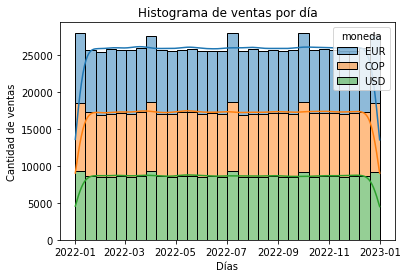

In [144]:
sns.histplot(data=df3, x='fecha',multiple='stack', hue='moneda', bins=30, kde=True)

plt.title('Histograma de ventas por día')
plt.xlabel('Días')
plt.ylabel('Cantidad de ventas')
plt.show()

## Un gráfico lineal con el monto de ventas diarias. Utilice un eje cada divisa según su magnitud.

## Un gráfico de barras del total del monto de ventas (en Pesos Colombianos) por cada tienda durante el año.

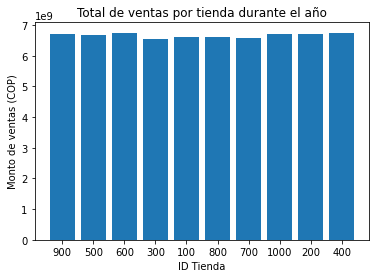

In [181]:
ventas_x_año = {
    '900': [6728144791],
    '500': [6694251356],
    '600': [6754151362],
    '300': [6545440003],
    '100': [6605647949],
    '800': [6622152711],
    '700': [6594344820],
    '1000': [6698399103],
    '200': [6705459383],
    '400': [6744845196]
}

tiendas = list(ventas_x_año.keys()) 
montos = [sum(ventas_x_año[tienda]) for tienda in tiendas]

plt.bar(tiendas, montos)

plt.title("Total de ventas por tienda durante el año") 
plt.xlabel("ID Tienda") 
plt.ylabel("Monto de ventas (COP)") 
plt.show()

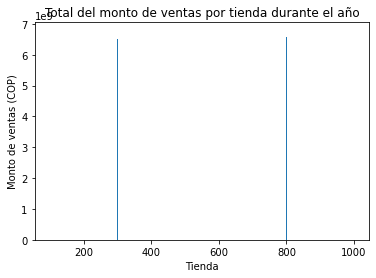

In [167]:
import pandas as pd
import matplotlib.pyplot as plt

df = df3.copy()

df['fecha'] = pd.to_datetime(df['fecha'])

df = df3[df3['moneda'] == 'COP']

ventas_por_tienda = df.groupby('id_tienda')['monto'].sum()

plt.bar(ventas_por_tienda.index, ventas_por_tienda.values)

plt.xlabel('Tienda')
plt.ylabel('Monto de ventas (COP)')
plt.title('Total del monto de ventas por tienda durante el año')

plt.show()

## Un gráfico circular del monto total de ventas (en Pesos Colombianos) por zonas

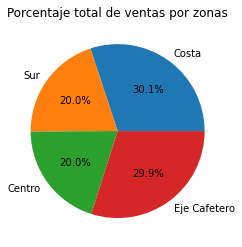

In [127]:
ventas_zona = {
    'Costa' : 142942414429.0,
    'Sur' : 95165851874.0,
    'Centro' : 95048698481.0,
    'Eje Cafetero' : 142121126679.0
}

zonas = list(ventas_zona.keys())
montos = list(ventas_zona.values())

plt.pie(montos, labels = zonas, autopct='%1.1f%%')
plt.title('Porcentaje total de ventas por zonas')
plt.show()

## Un gráfico de dispersión del monto de ventas (en Pesos Colombianos) vs El día del mes (1 al 31). Utilice distintos marcadores y colores para indicar el tipo de tránsito y la nacionalidad del comprador.

## Visualizaciones adicionales: Mapas

Los datos poseen latitud y longitud de cada una de las sedes de la compañía. Realice un Mapa interactivo donde coloque un marcador en cada una de las sedes y que adicional muestre:

- Nombre de la tienda.
- ID de la tienda.
- Aeropuerto y ciudad.
- Sigla del aeropuerto.
- Región.
- Cantidad de ventas realizadas.
- Suma total de las ventas (En COP).

`TIP`: Puede utilizar (Folium)[https://python-visualization.github.io/folium/quickstart.html] para realizar el mapa.